#  Project : 
## Unveiling Rating Bias: A Data Analysis of Movie Ratings and Review Systems 

## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:
1. Conducting in-depth analysis of Fandango website rating system for 437 films, revealing rounding discrepancies.
2. Identifying instances of inflated movie ratings due to Fandango's rounding system, potentially indicating bias.


## Background and Data


Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s]
(http://fivethirtyeight.com/features/fandango-movies-ratings/)**


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

Here’s a breakdown of how Fandango.com’s system handled the rounding for each of the 437 films in our sample:

On 109 occasions, about a quarter of the time, the ratingValue was the same as the number of stars presented. This means that a movie’s average rating was already at a half-star and no rounding occurred.
On 148 occasions, about 34 percent of the time, Fandango rounded as you would expect — rounding up 0.1 or 0.2 stars,11 like one would round a 3.9 or 3.8 to a 4.
On 142 occasions (including for “Ted 2”), 32 percent of the time, Fandango added 0.3 or 0.4 stars to the rating,12 when one would normally round down, juicing up the score by a half-star. Think of it this way: That’s the equivalent of saying your SAT score13 was about 100 to 120 points higher than it actually was.
On 37 occasions, about 8 percent of the time, Fandango’s rounding system added a half-star to the film’s rating. It’s not clear why this happened — why “Avengers: Age of Ultron” would have its 4.5 ratingValue rounded up to 5 stars — but it happened about 1 in 12 times. It may be that Fandango is rounding at the second decimal place — e.g., 4.51 to 5. But again, it’s not clear; the “ratingValue” in the HTML code is only shown to the first decimal place.
On one occasion, a film was rounded up by an entire star, from a 4 to a 5.

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

In [1]:
# Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings


In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

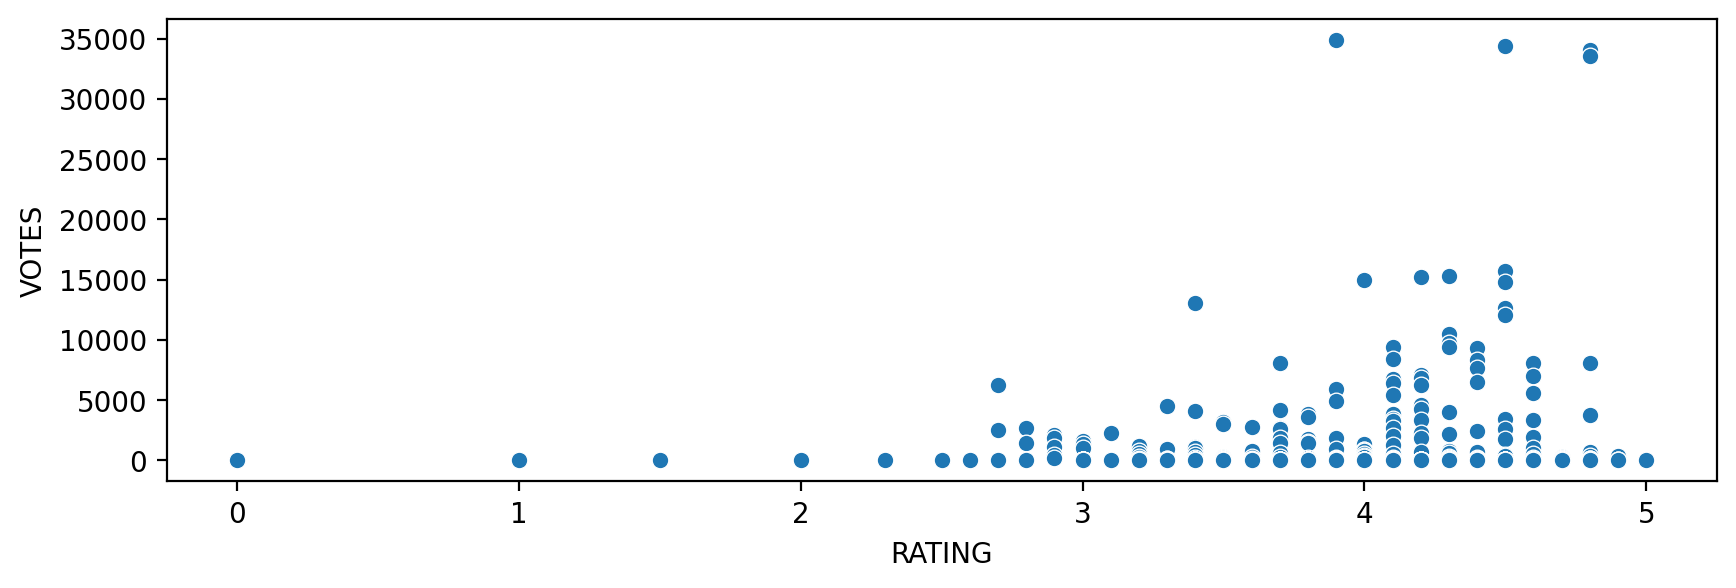

In [6]:
plt.figure(figsize=(10,3),dpi=200)
sns.scatterplot(x='RATING',y='VOTES',data=fandango)

Calculating the correlation between the columns:

In [7]:
fandango[['STARS','RATING','VOTES']].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Creating a new column that is able to strip the year from the title strings and set this new column as YEAR

In [8]:
def split_fan(Film):
    fan = Film.split()
    return fan[-1][1:5]


In [9]:
split_fan('Fifty Shades of Grey (2015)')

'2015'

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(split_fan)

In [11]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [12]:
#fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [13]:
#fandango

Calculating the No. of movies are in the Fandango DataFrame per year?

In [14]:
fandango['YEAR'].value_counts().head()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

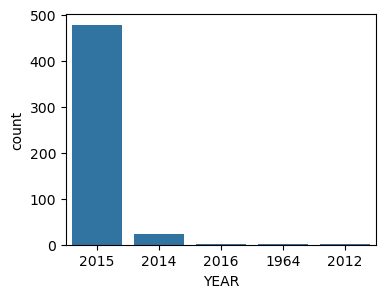

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(x='YEAR',data=fandango)

In [16]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014



The nlargest method in pandas is used to get the top N largest values based on a specified column. In our case, we want to get the top 10 rows from the 'VOTES' column in the fandango DataFrame.

In [17]:
sum(fandango[fandango['VOTES'] == 0].value_counts())

69

sum(): This calculates the sum of all the counts in the Series. Essentially, it adds up the number of rows that satisfy the condition 'VOTES' equal to 0 in the original DataFrame.

Creating a DataFrame of only reviewed films by removing any films that have zero votes.

In [18]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [19]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


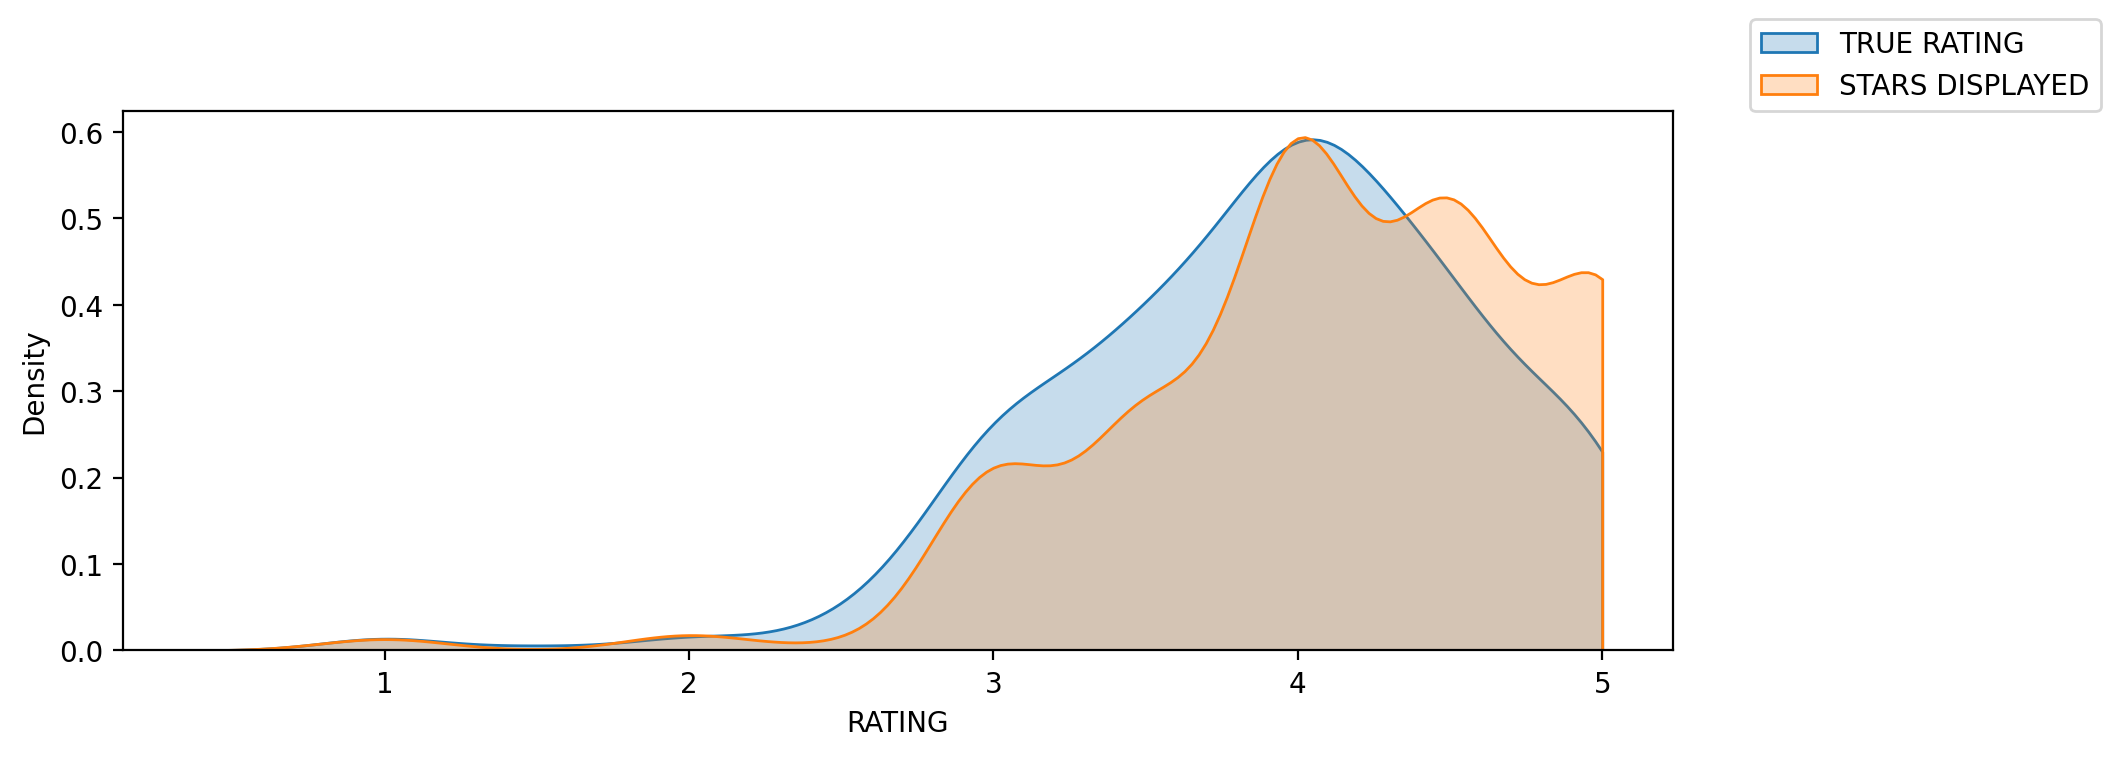

In [20]:
plt.figure(figsize=(10,3.5),dpi=200)
sns.kdeplot(x='RATING',data=fan_reviewed,clip=[0,5],fill=True,label='TRUE RATING')
sns.kdeplot(x='STARS',data=fan_reviewed,clip=[0,5],fill=True,label='STARS DISPLAYED')
plt.legend(loc=(1.05,1))

In [21]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\anand\AppData\Local\Temp\ipykernel_23300\1100526480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\anand\AppData\Local\Temp\ipykernel_23300\1100526480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [22]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


C:\Users\anand\AppData\Local\Temp\ipykernel_23300\2801532016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STARS_DIFF',data=fan_reviewed,palette='Set1')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

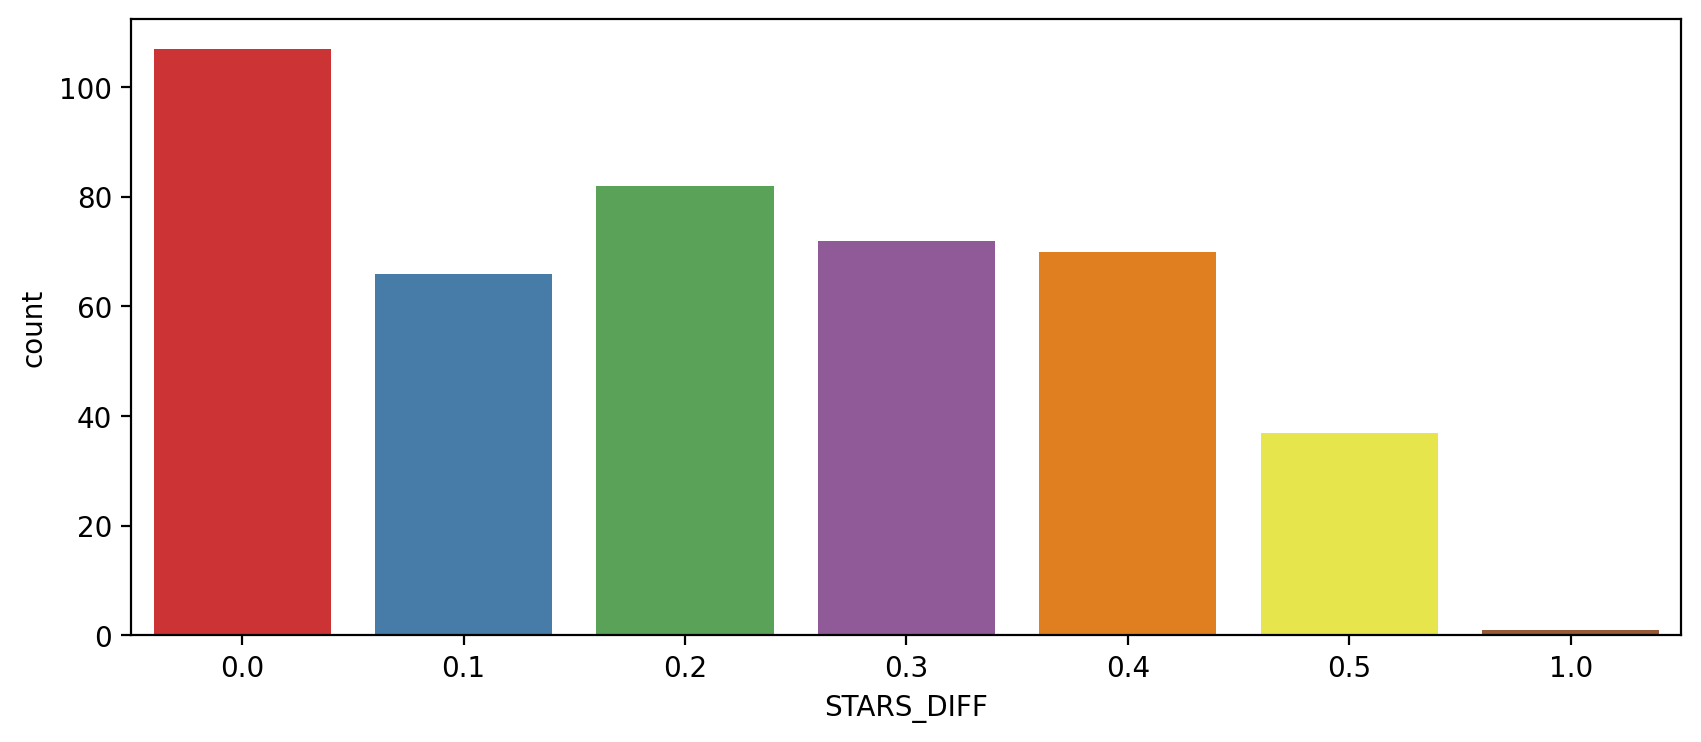

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='STARS_DIFF',data=fan_reviewed,palette='Set1')

We see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [24]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

In [25]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [26]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [27]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [28]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [29]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

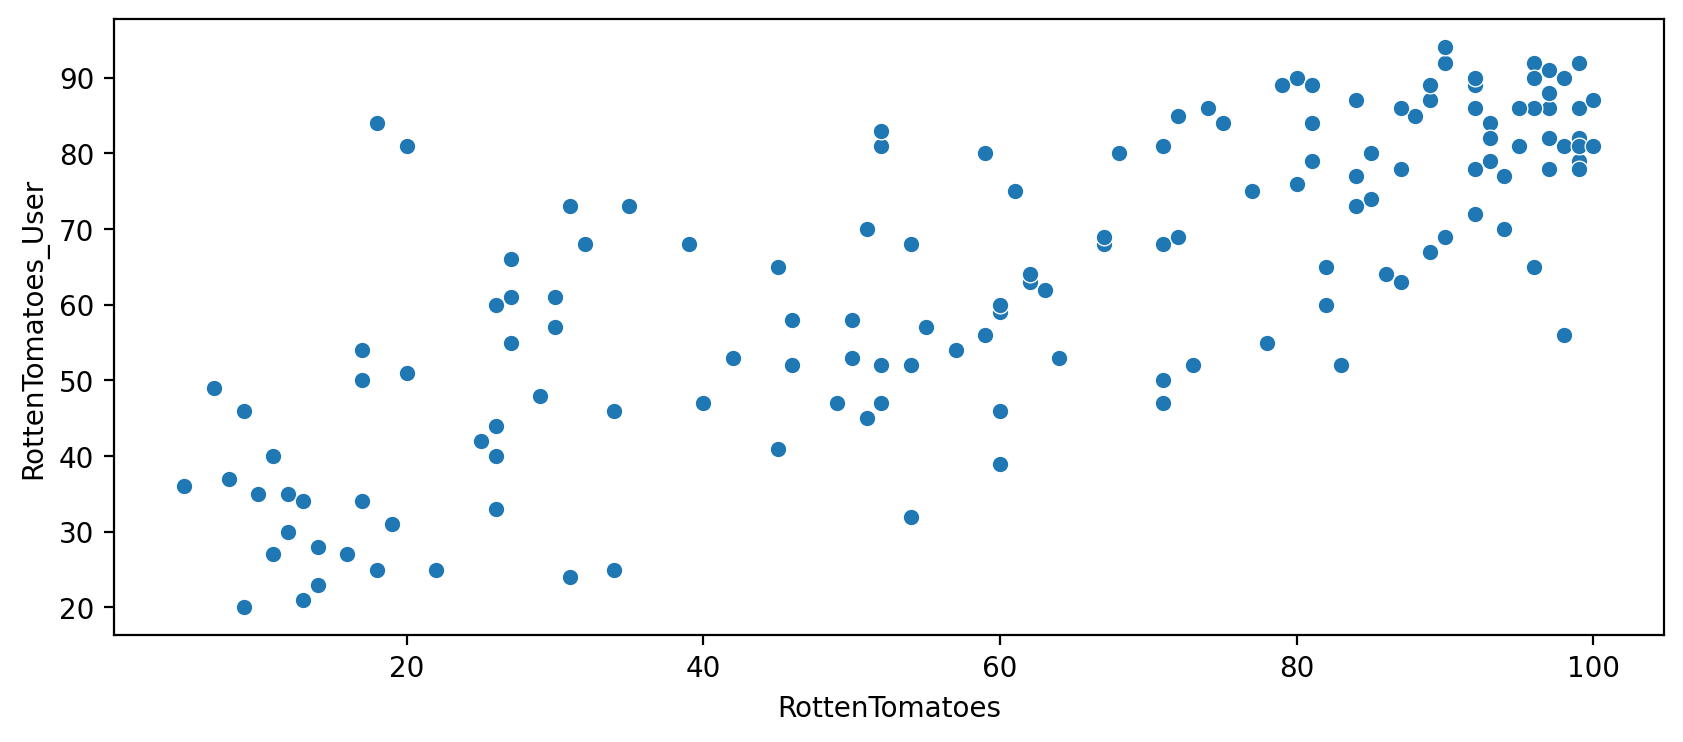

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)

In [31]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [32]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [33]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

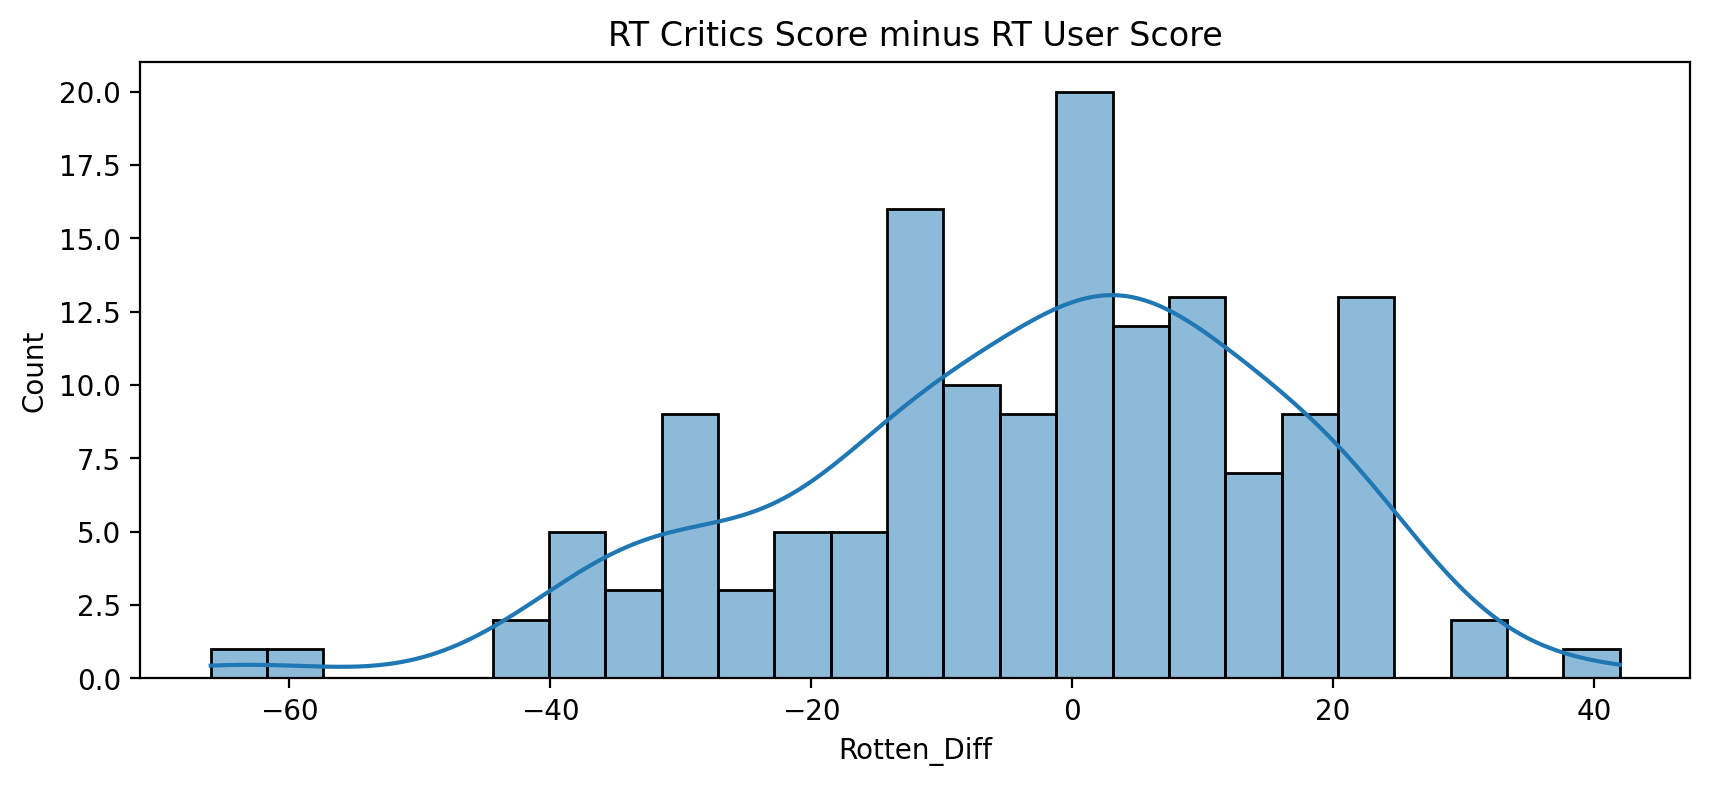

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x='Rotten_Diff',data=all_sites,kde=True,bins=25)
plt.title('RT Critics Score minus RT User Score')

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

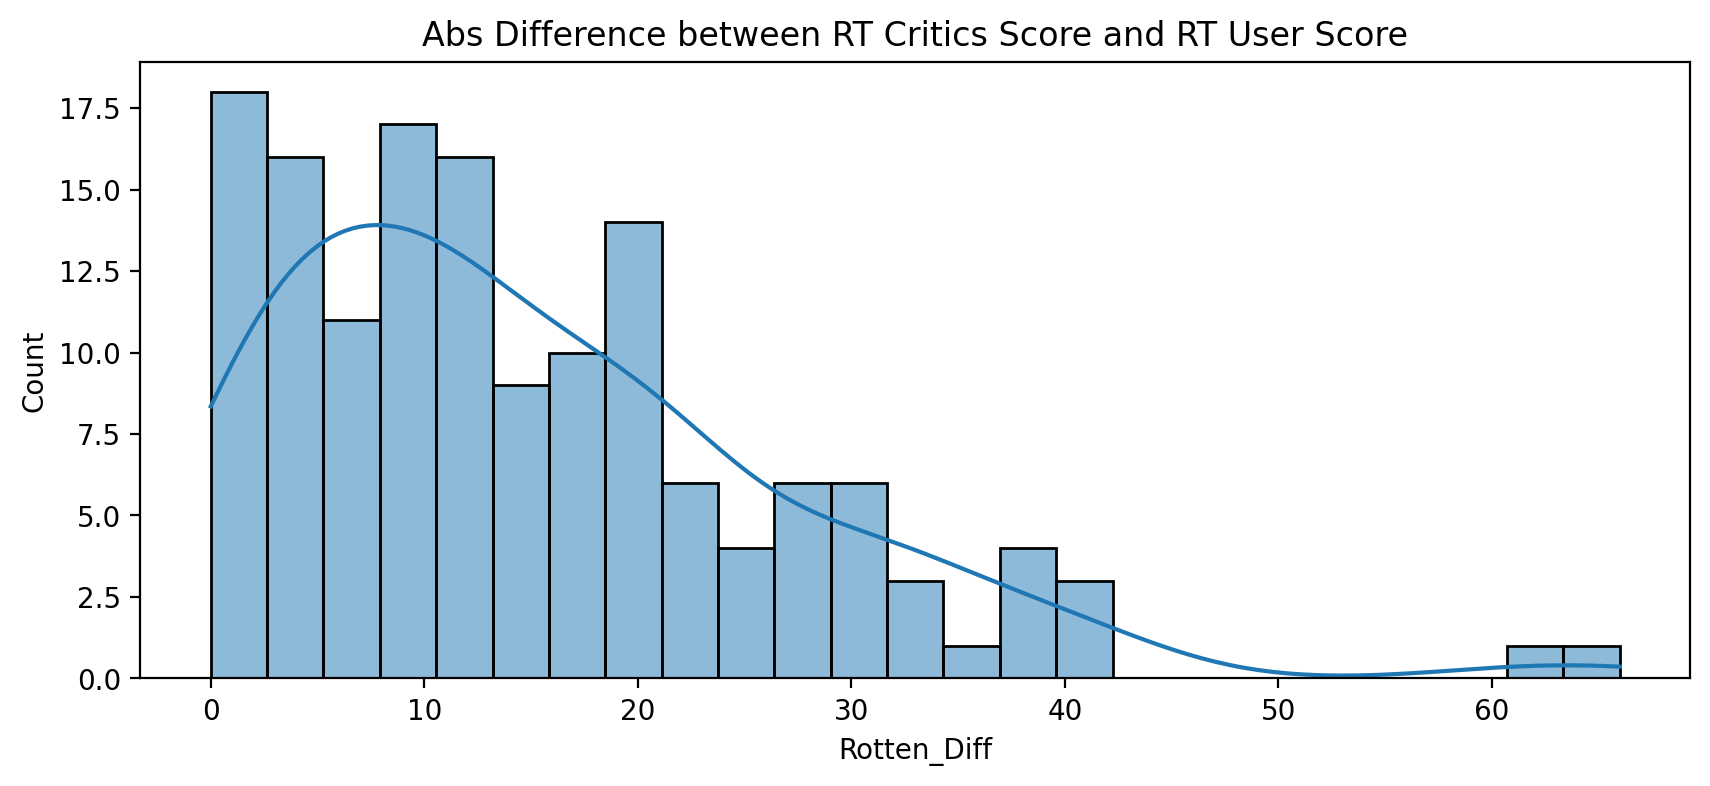

In [35]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)
plt.title('Abs Difference between RT Critics Score and RT User Score')


In [36]:
print('Users Love but Critics hate')
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [37]:
print('Critics love, but Users Hate')
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

(0.0, 10.0)

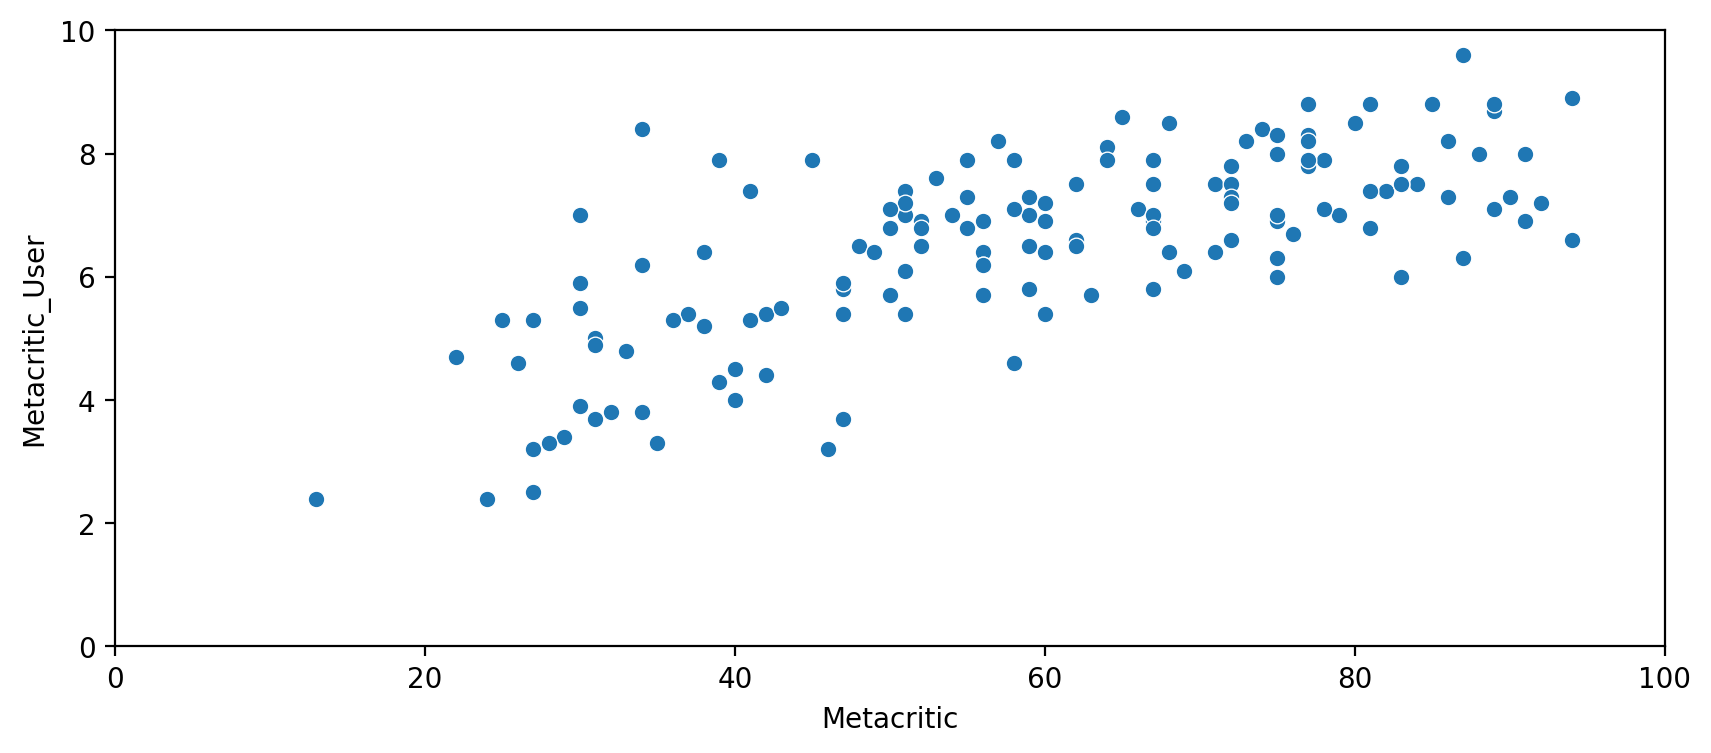

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Metacritic',y='Metacritic_User',data=all_sites)
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

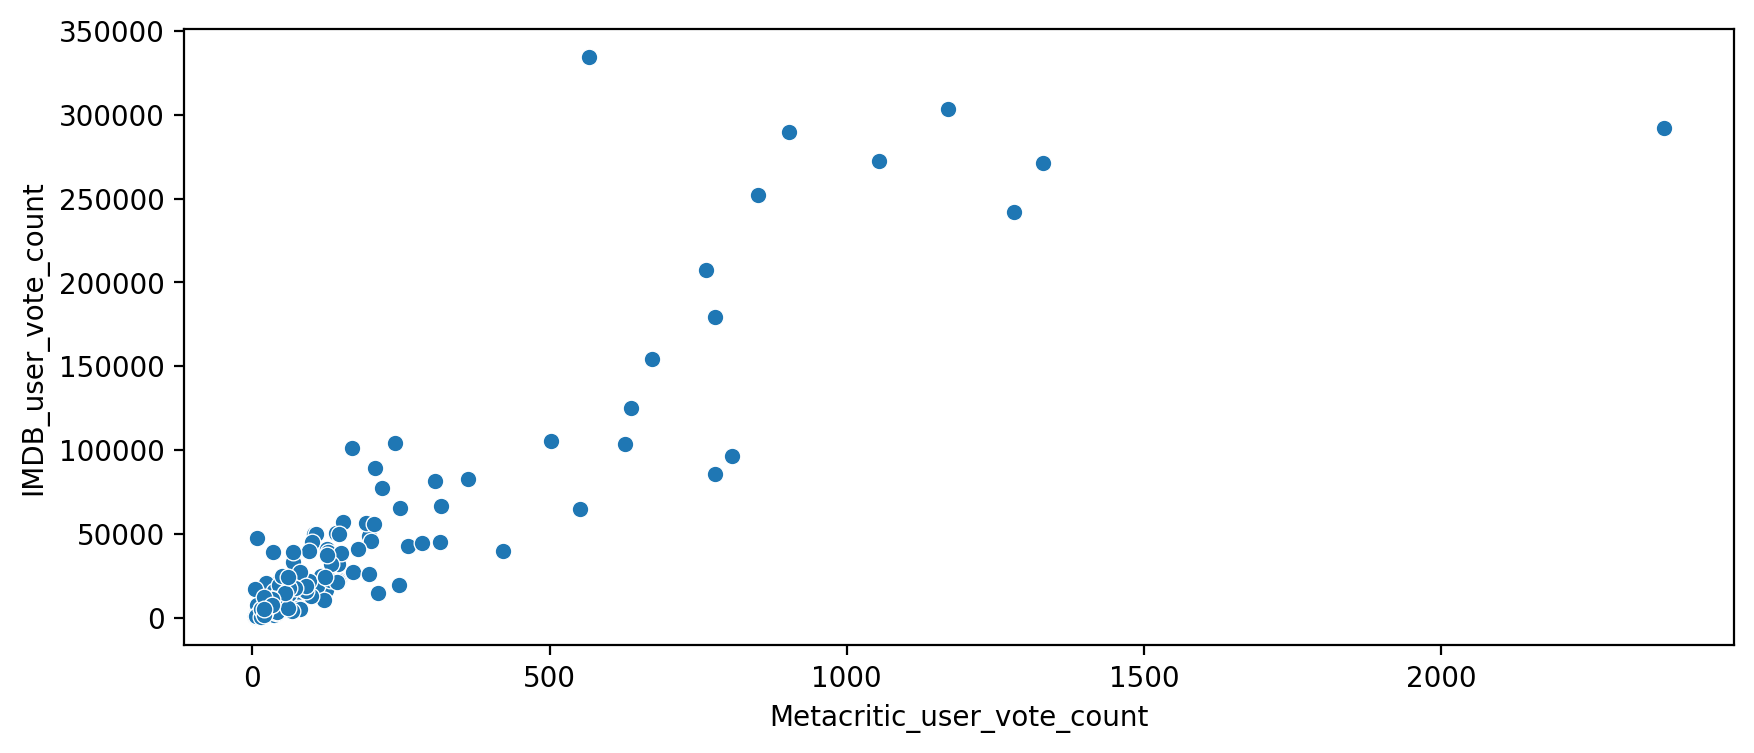

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data=all_sites)

In [40]:
all_sites[(all_sites['Metacritic_user_vote_count'] > 500) & (all_sites['IMDB_user_vote_count'] > 320000)]

#OR
# all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [41]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites


In [42]:
df = pd.merge(fandango,all_sites,how='inner',on='FILM').head()

In [43]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [44]:
pd.merge(fandango,all_sites,how='inner',on='FILM').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

* 100/20 = 5 
* 10/2 = 5

In [45]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                    98.0
RottenTomatoes_User               90.0
Metacritic                        94.0
Metacritic_User                    8.9
IMDB                               8.6
Metacritic_user_vote_count      1281.0
IMDB_user_vote_count          251856.0
Rotten_Diff                        8.0
Name: max, dtype: float64

In [46]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

# we are dividing the column by 20 to get it in the range of 0,5 and then rounding it to 1 decimal place and creating new columns

In [47]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [48]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

# Here we are dividing by 2 to get it in range of 0,5

In [49]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [51]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [52]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

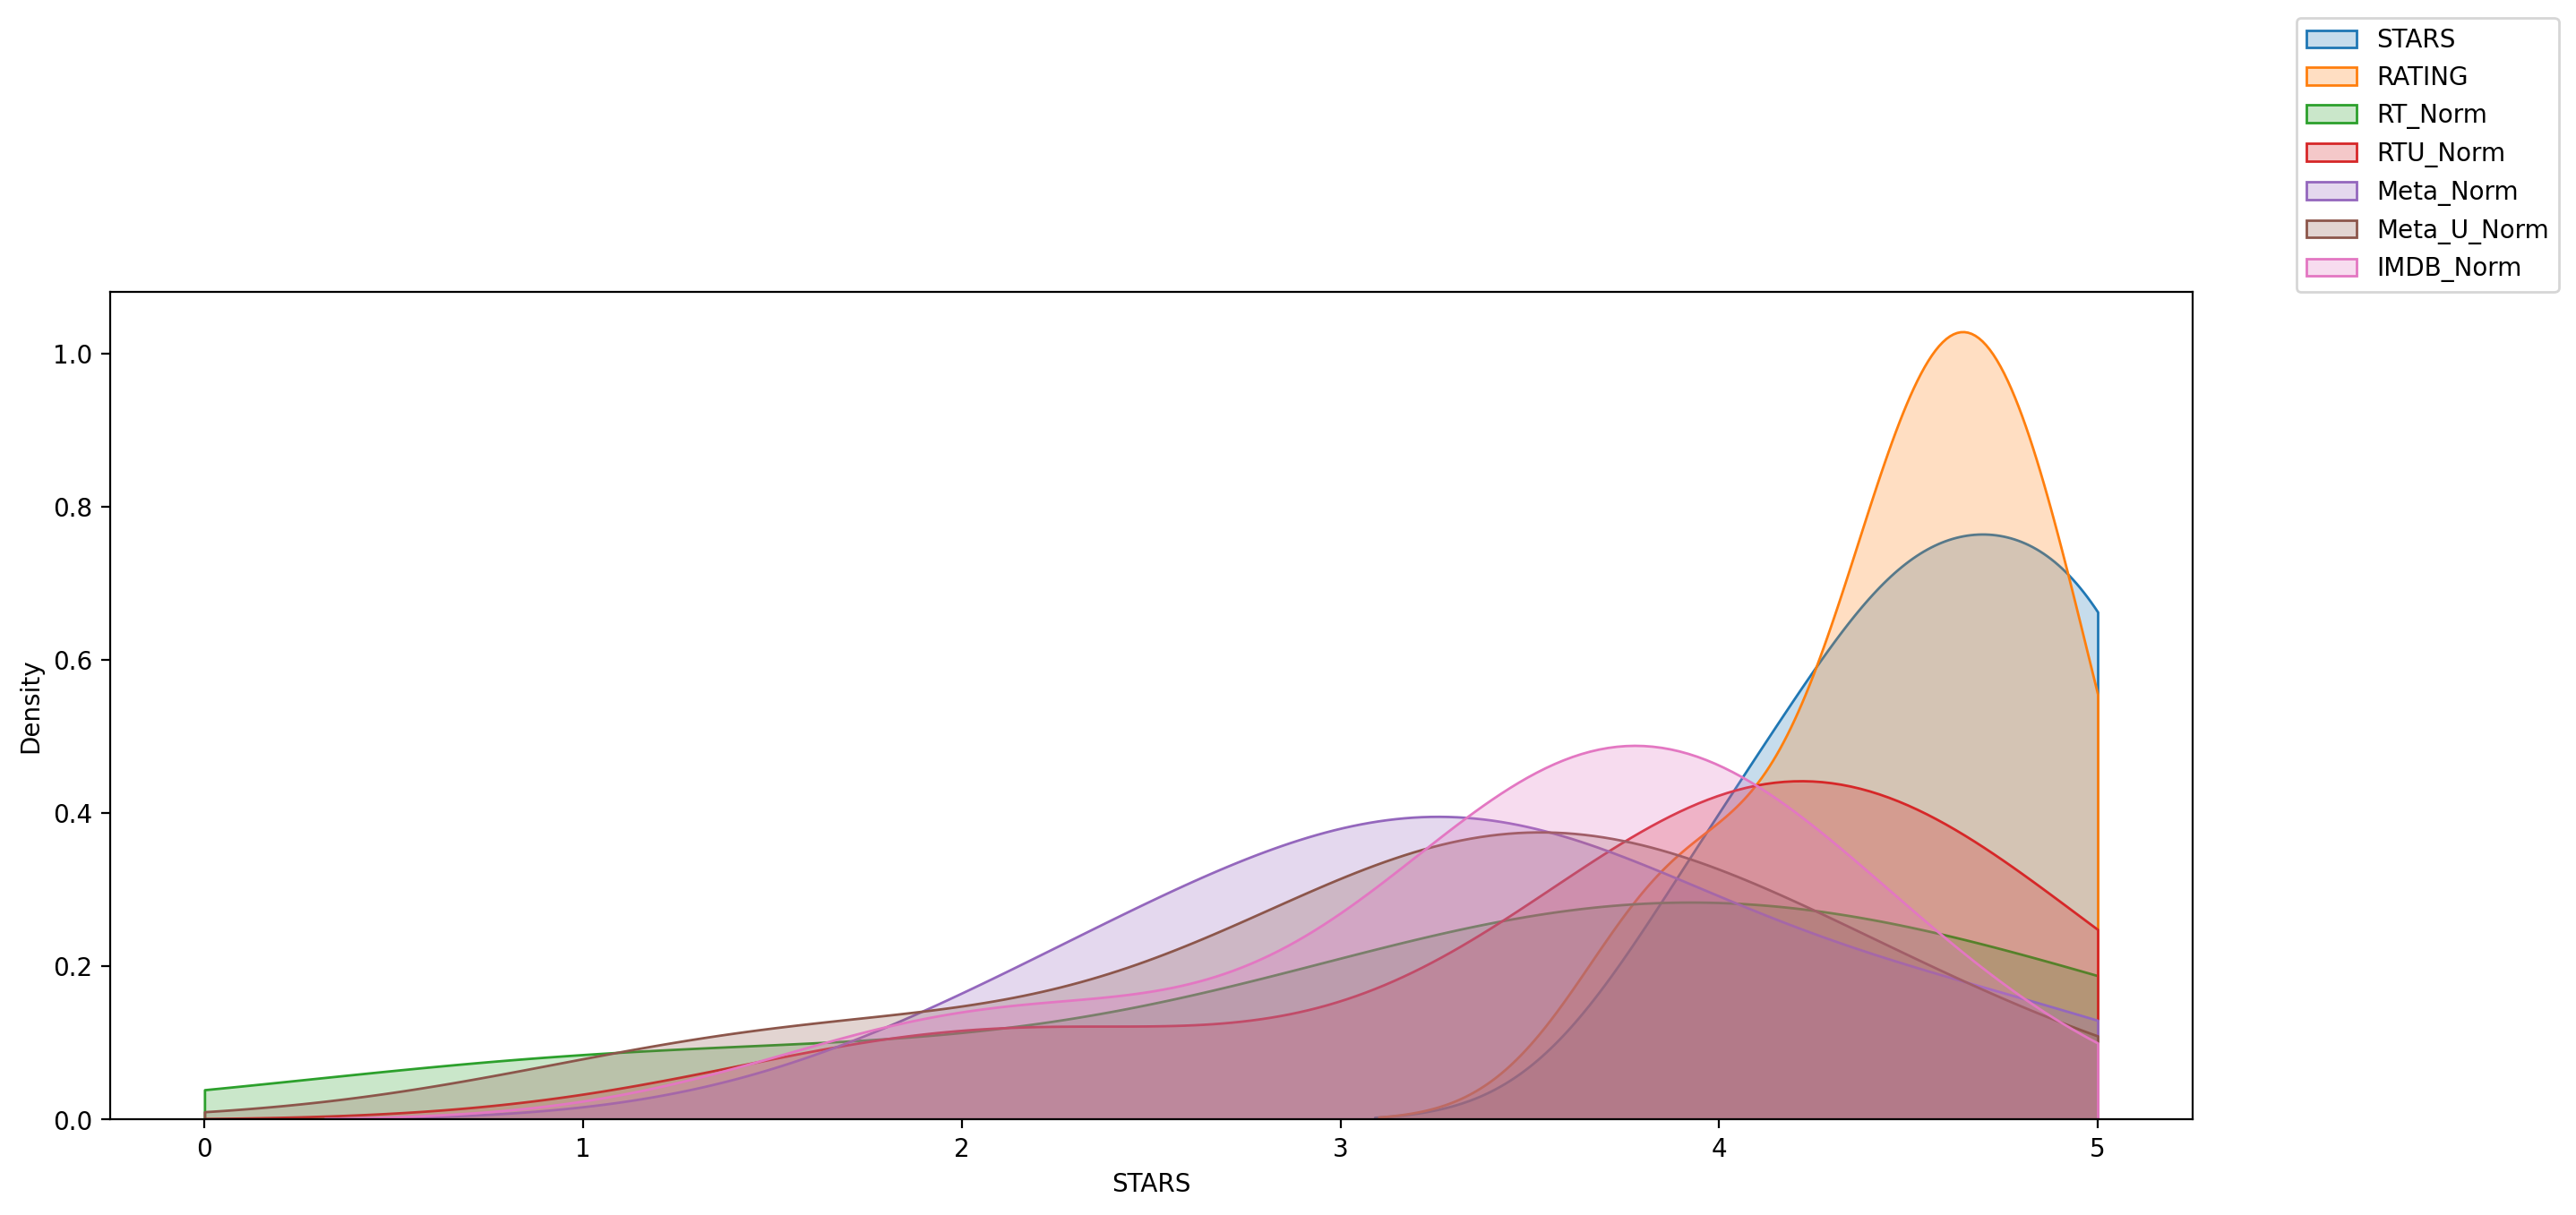

In [53]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(x='STARS',data=norm_scores,fill=True,label='STARS',clip=[0,5])
sns.kdeplot(x='RATING',data=norm_scores,fill=True,label='RATING',clip=[0,5])
sns.kdeplot(x='RT_Norm',data=norm_scores,fill=True,label='RT_Norm',clip=[0,5])
sns.kdeplot(x='RTU_Norm',data=norm_scores,fill=True,label='RTU_Norm',clip=[0,5])
sns.kdeplot(x='Meta_Norm',data=norm_scores,fill=True,label='Meta_Norm',clip=[0,5])
sns.kdeplot(x='Meta_U_Norm',data=norm_scores,fill=True,label='Meta_U_Norm',clip=[0,5])
sns.kdeplot(x='IMDB_Norm',data=norm_scores,fill=True,label='IMDB_Norm',clip=[0,5])
#plt.xlim(0,5)
#plt.ylim(0,0.12)
plt.legend(loc = (1.05,1))

In [54]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\anand\AppData\Local\Temp\ipykernel_23300\3605777113.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')
C:\Users\anand\AppData\Local\Temp\ipykernel_23300\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


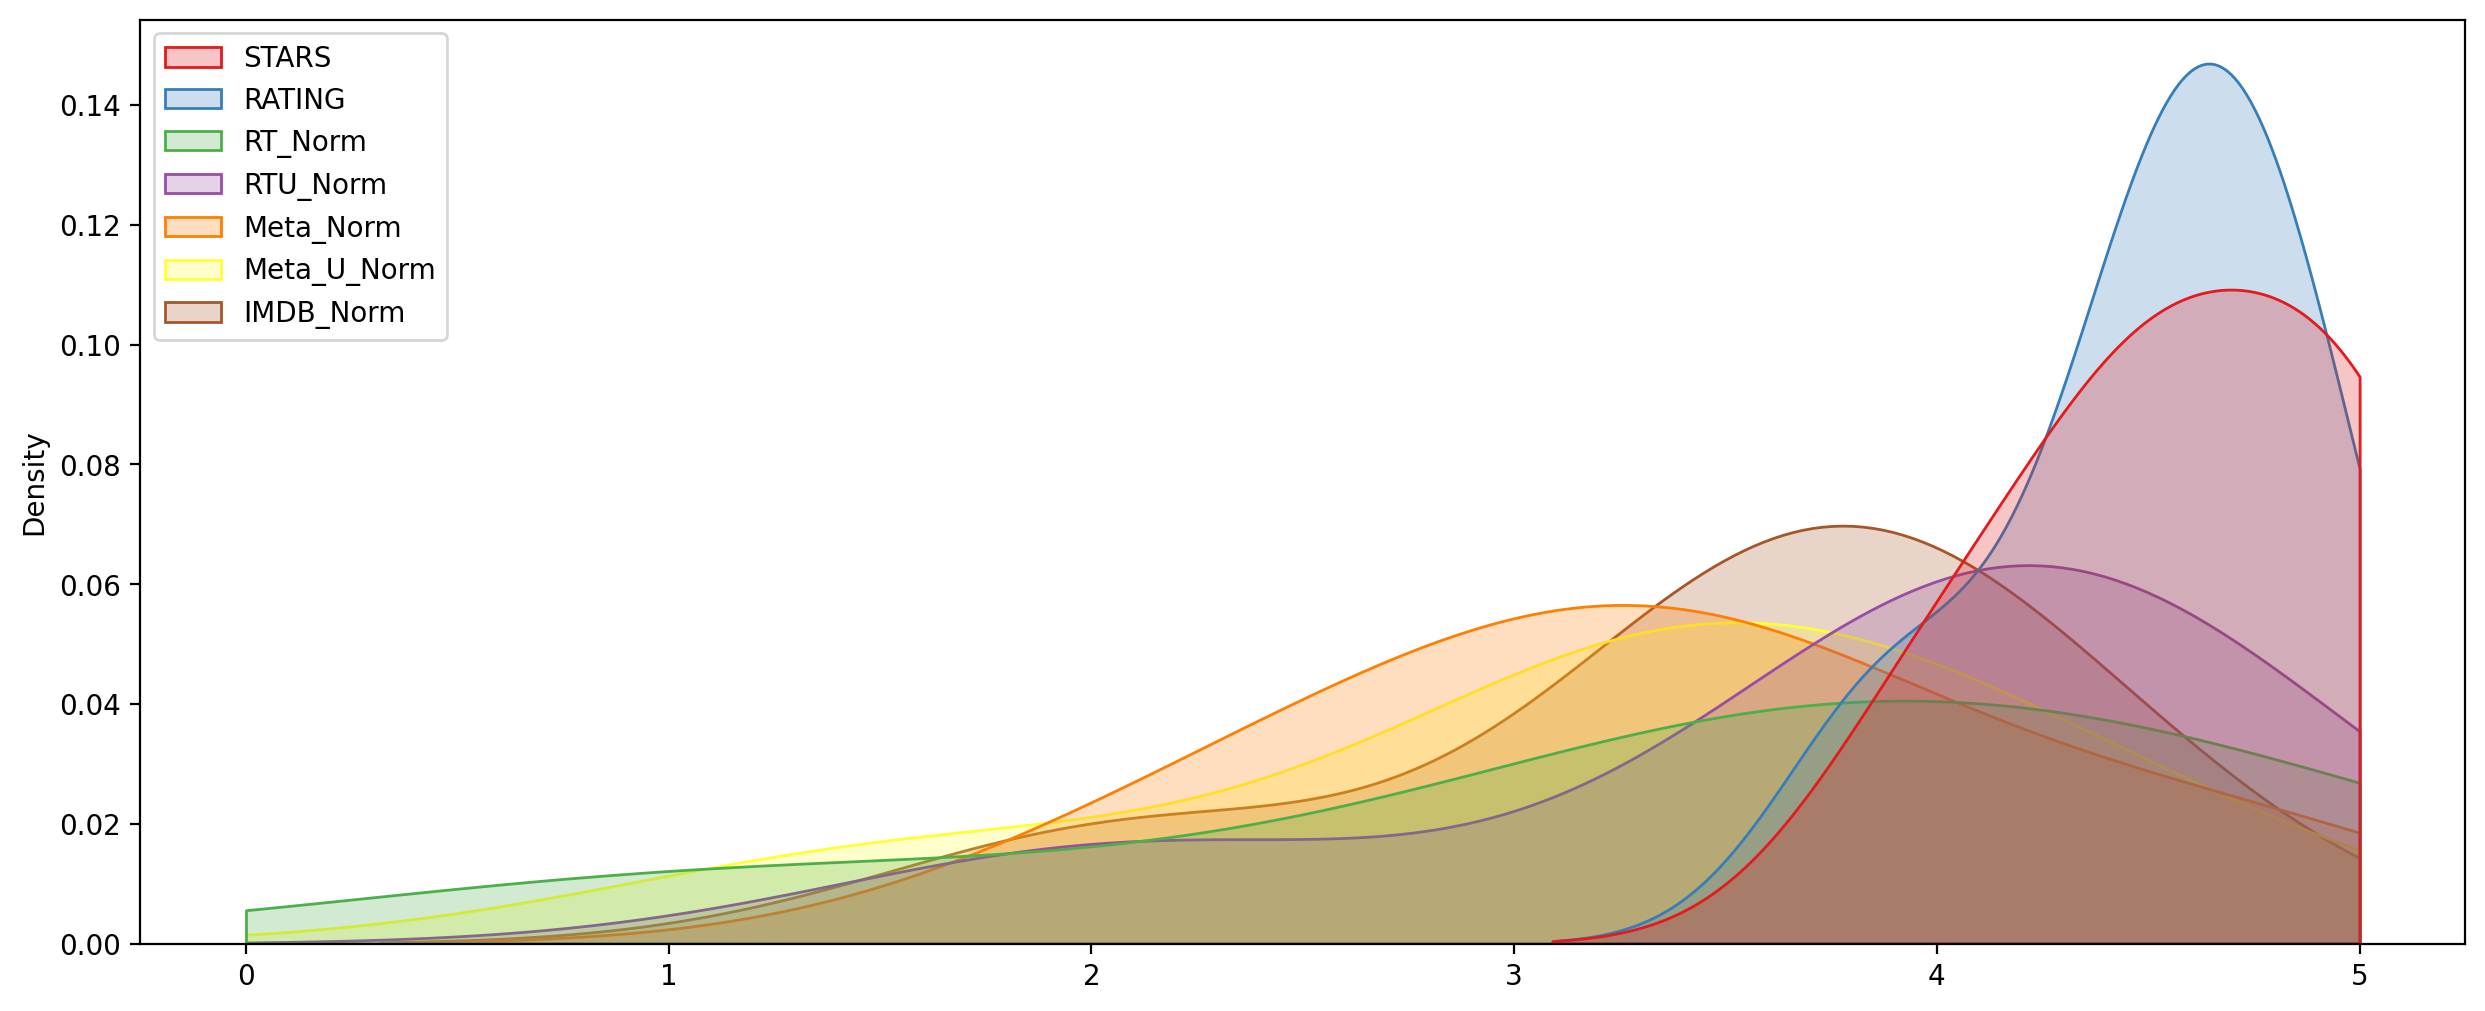

In [55]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')
#plt.legend(loc=(1.05,1)) ---> This gives error, since it doesnt automatically gives legend for the entire plot
#to avoid we copy pasted the code from github
move_legend(ax,'upper left')

C:\Users\anand\AppData\Local\Temp\ipykernel_23300\4037728962.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')
C:\Users\anand\AppData\Local\Temp\ipykernel_23300\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


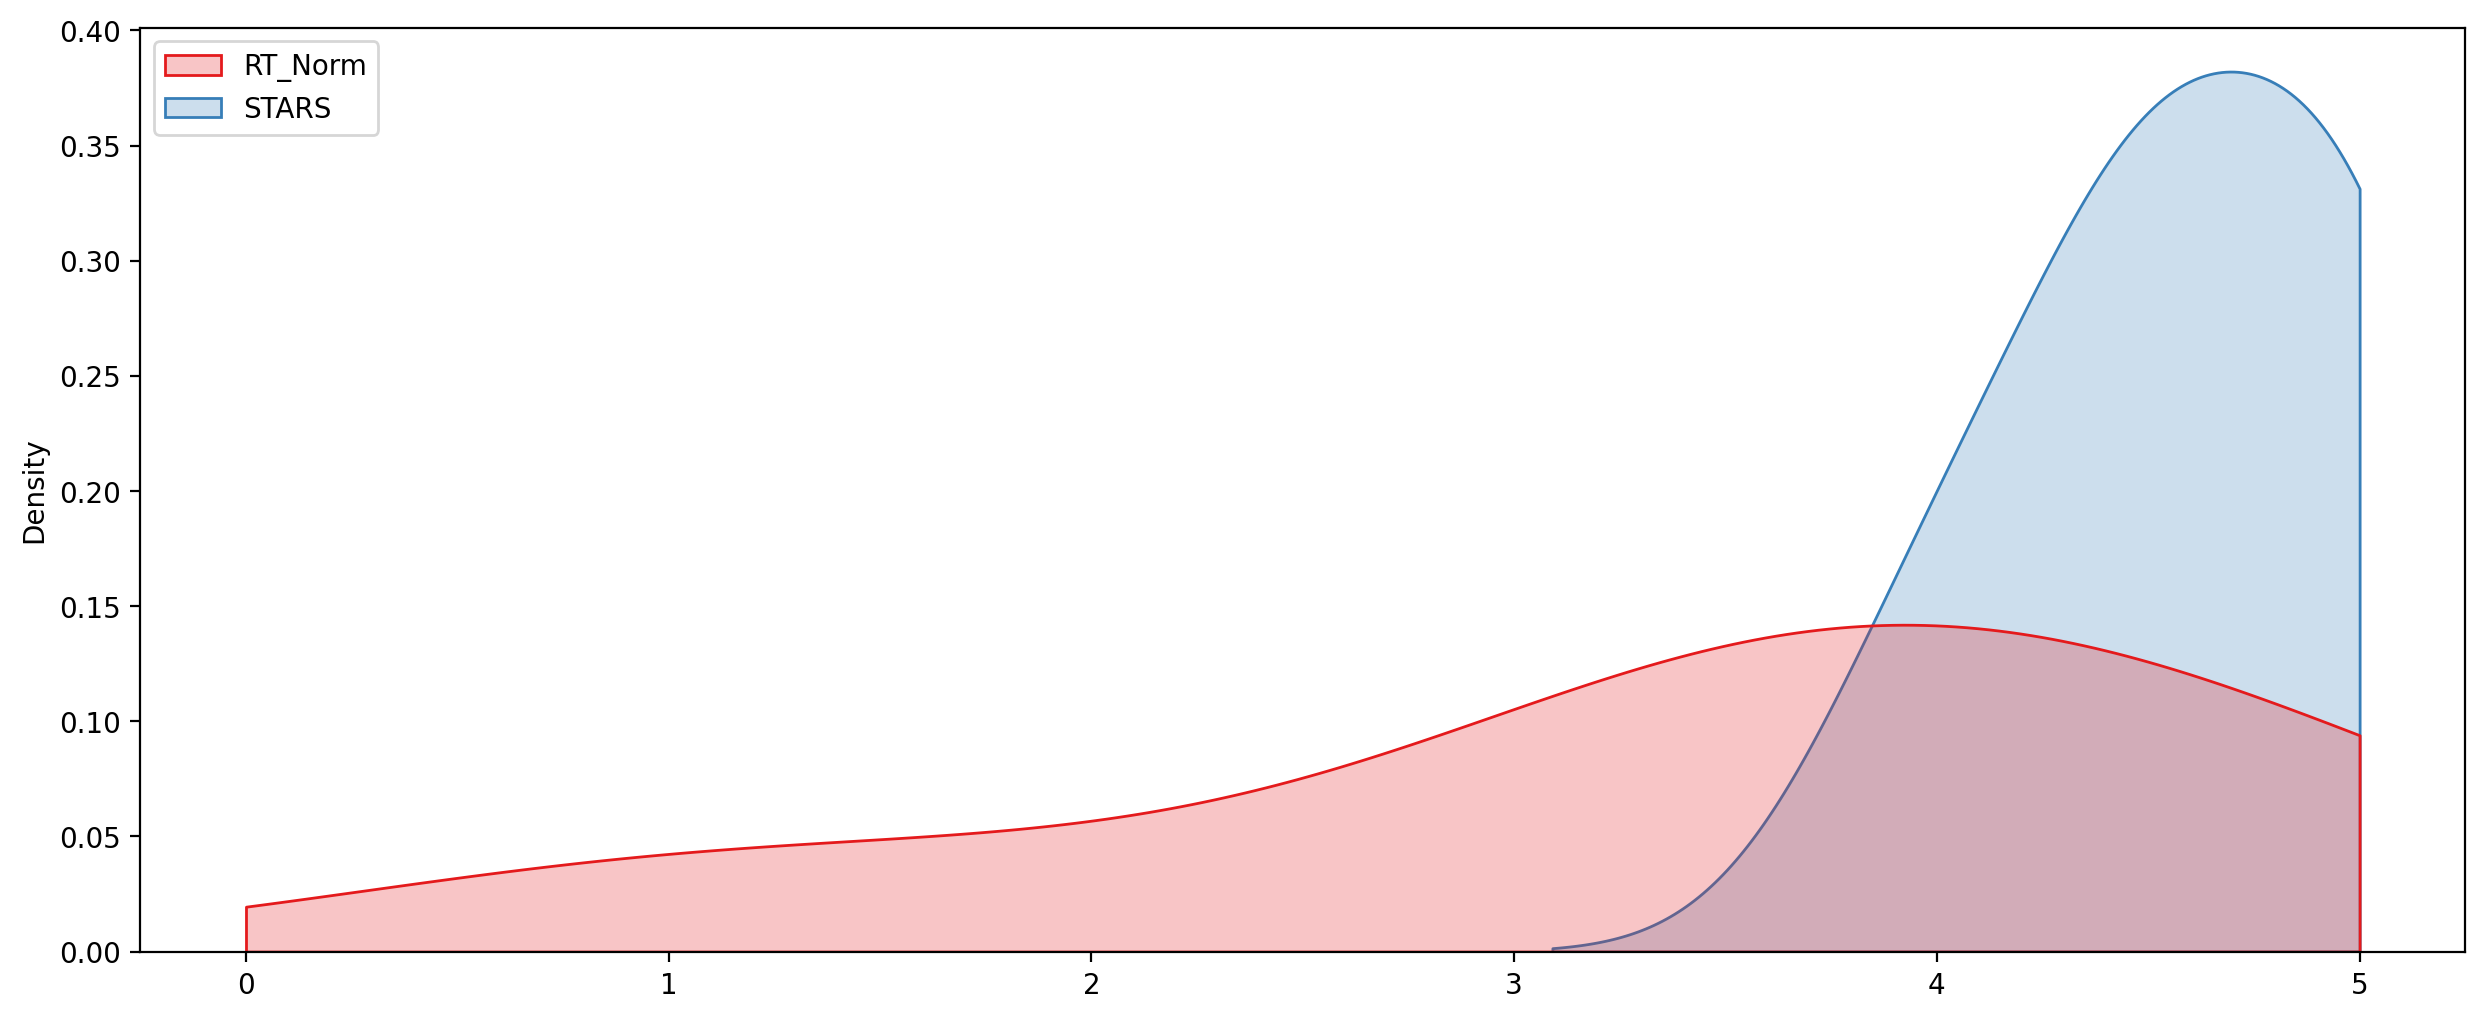

In [56]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')
#plt.legend(loc=(1.05,1))
move_legend(ax,'upper left')

<Axes: ylabel='Count'>

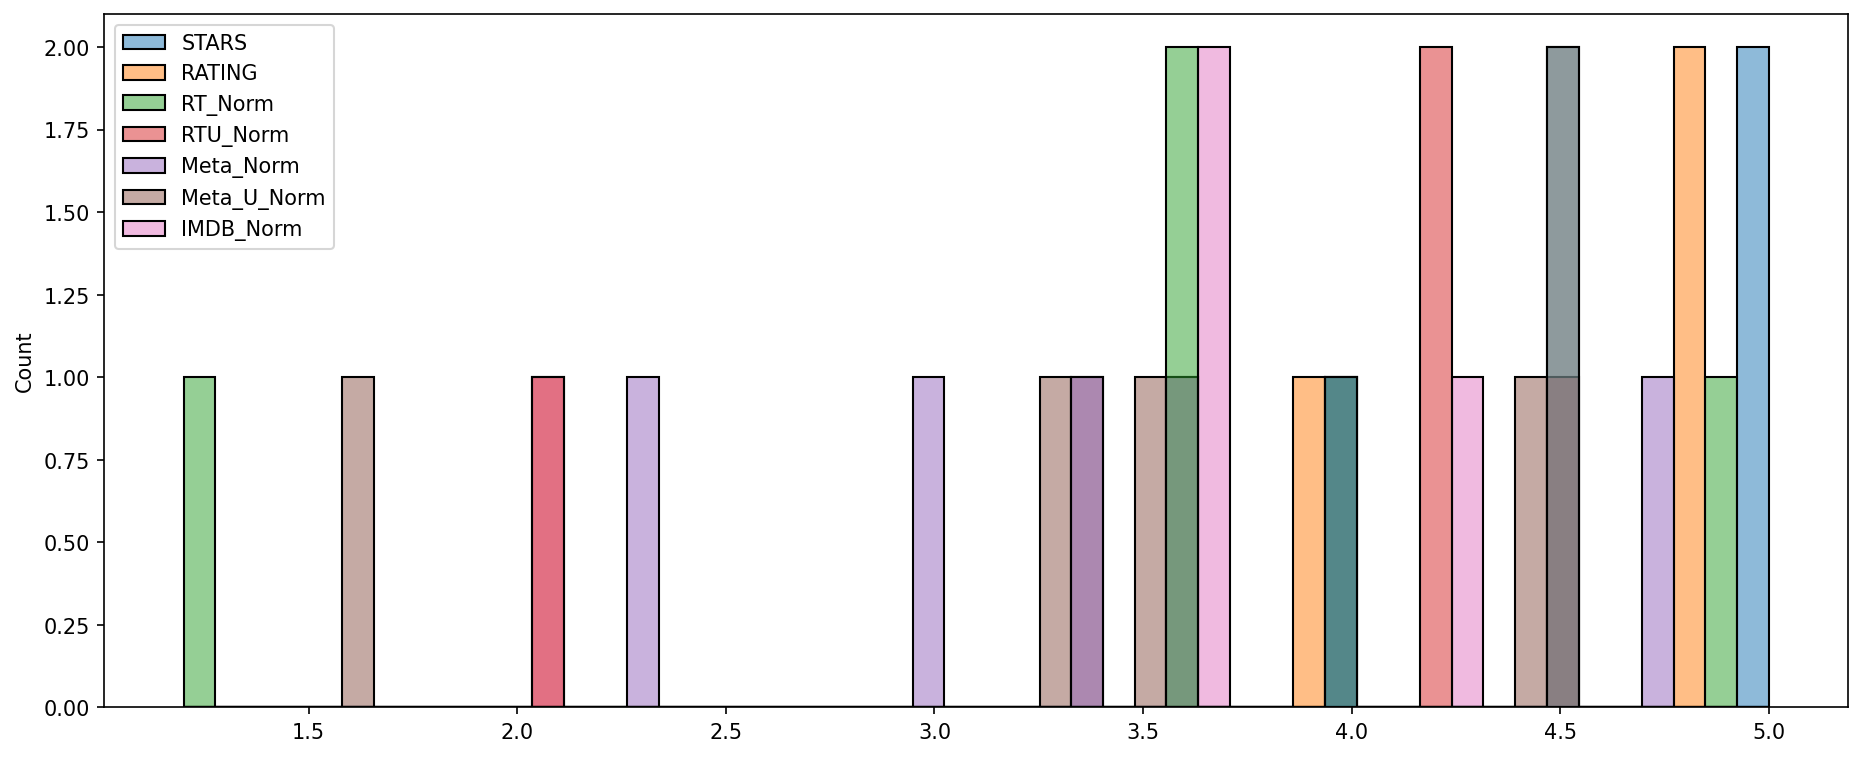

In [66]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)


### How are the worst movies rated across all platforms?

<Figure size 1000x600 with 0 Axes>

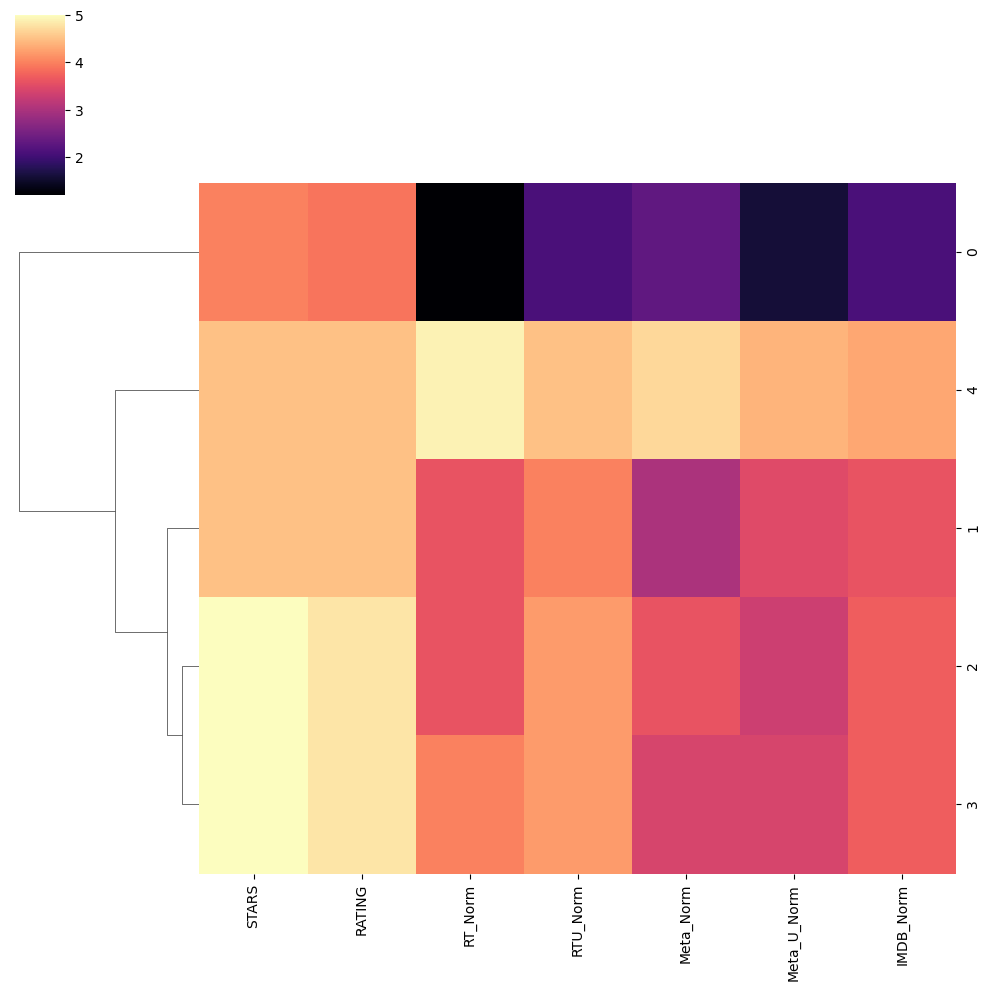

In [58]:
plt.figure(figsize=(5,3),dpi=200)
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [59]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [60]:
norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [61]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

In [62]:
worst_films

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


C:\Users\anand\AppData\Local\Temp\ipykernel_23300\1515561580.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
C:\Users\anand\AppData\Local\Temp\ipykernel_23300\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


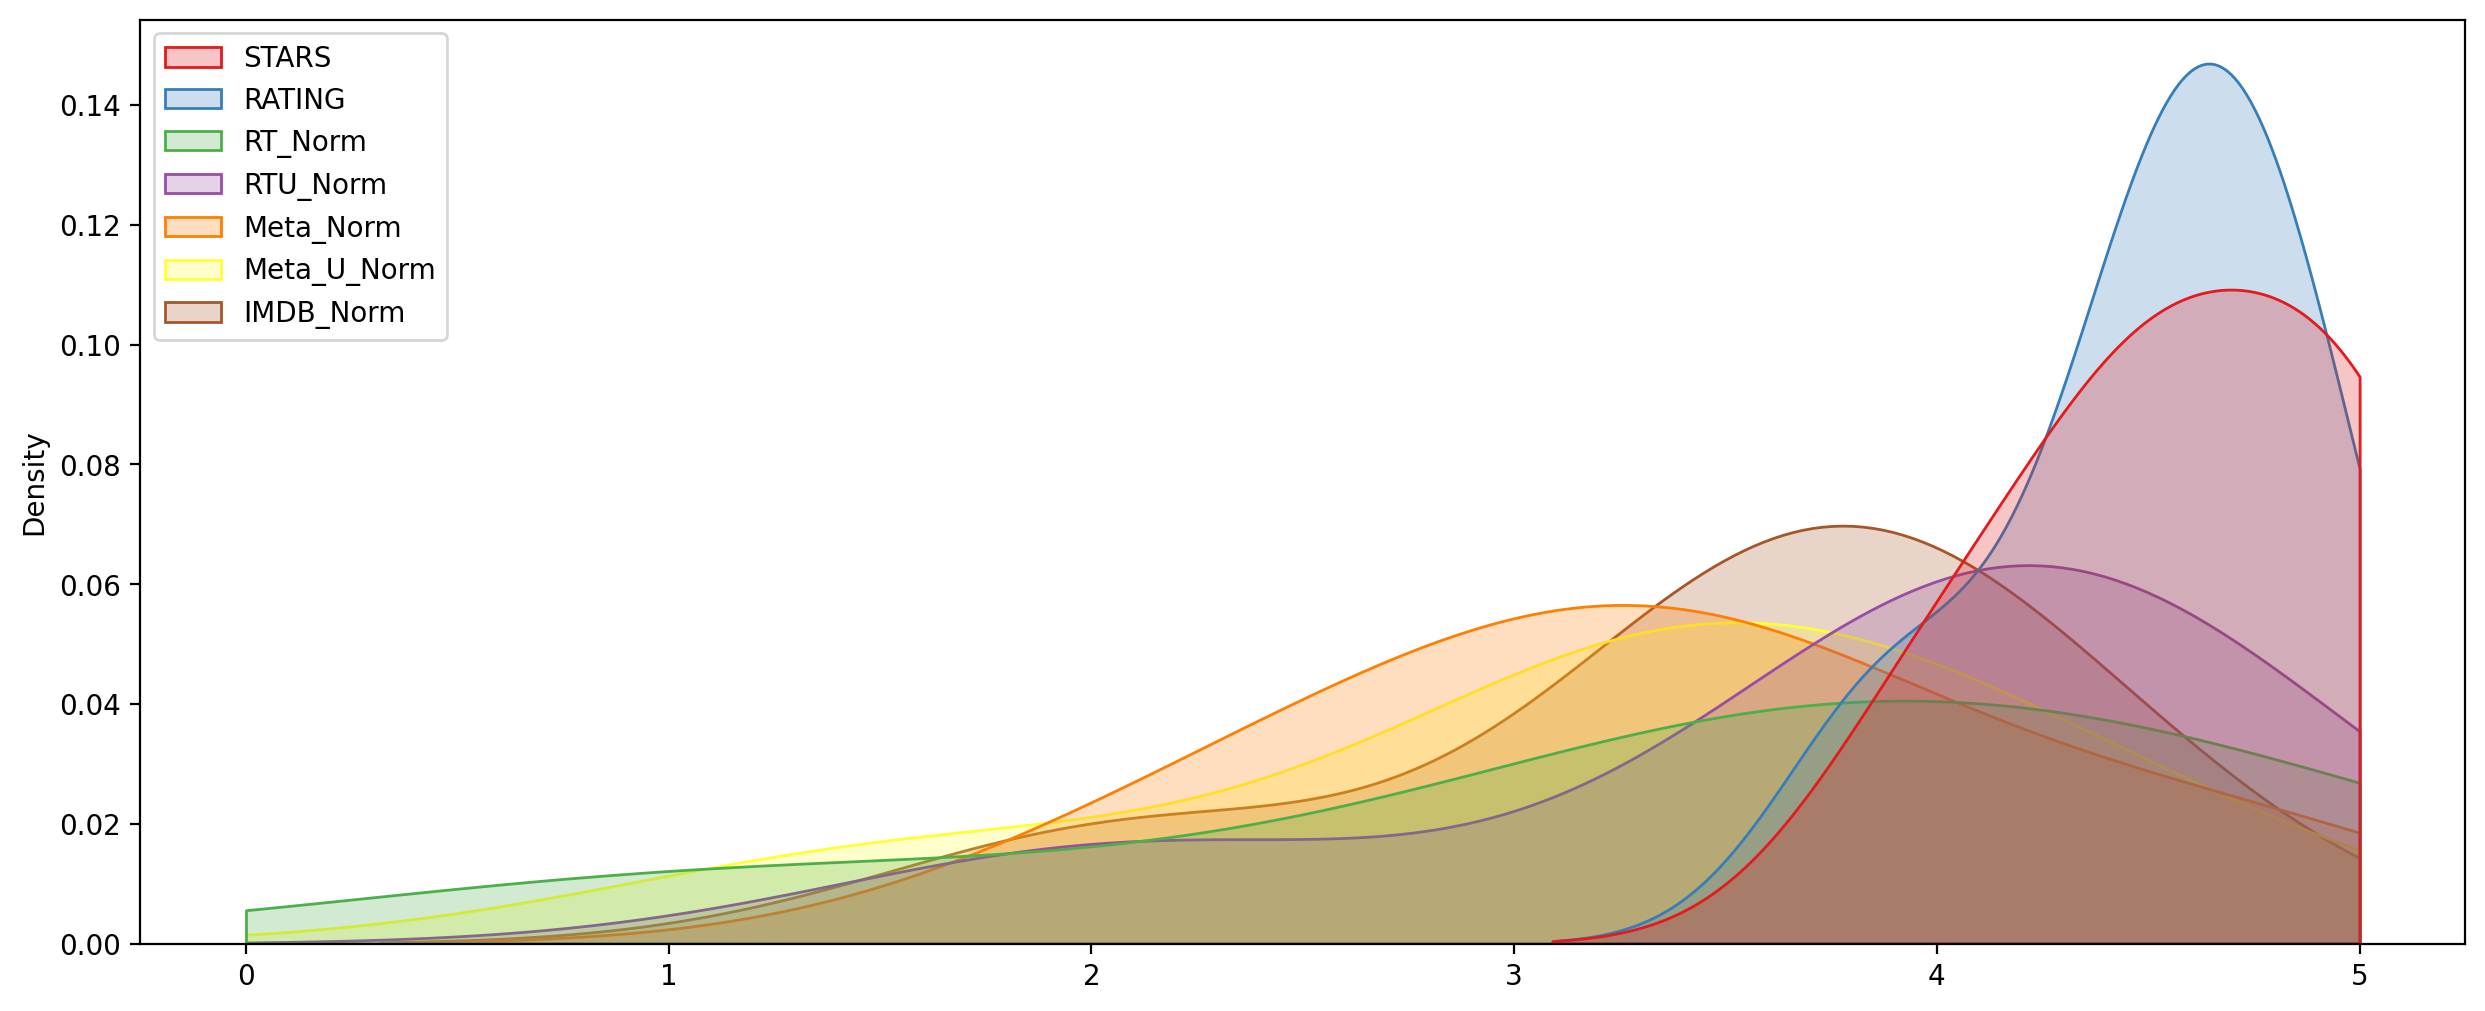

In [63]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
#plt.legend(loc=(1.05,1))
move_legend(ax,'upper left')

Fandango is showing around 3-4 star ratings for films that are clearly bad. Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86] across the other platforms!

----